## 常用的DataFrame操作
- merge / transform
- subset
- groupby


In [13]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# 設定資料讀取路徑
dir_path = '/home/edith/文件/100days-data/'
data_app = os.path.join(dir_path,'application_train.csv')
data_app1 = pd.read_csv(data_app)
data_app1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP

 - 0 個小孩
 - 有 1 - 2 個小孩
 - 有 3 - 5 個小孩
 - 有超過 5 個小孩


2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [15]:
#1
"""
Your code here
"""
#method1
# cut_rule = [0,0.5,2.5,5.5,data_app1['CNT_CHILDREN'].max()]
#data_app1['CNT_CHILDREN_GROUP'] = pd.cut(data_app1['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
#data_app1['CNT_CHILDREN_GROUP'].value_counts()


#method2
def cut_rule(children_count):
    if children_count == 0:
        return "0位小孩"
    elif children_count <=2:
        return "1-2位小孩"
    elif children_count <=5:
        return "3-5位小孩"
    else :
        return "超過5位小孩"
    

data_app1['CNT_CHILDREN_GROUP'] = data_app1['CNT_CHILDREN'].apply(lambda row: cut_rule(row))
data_app1['CNT_CHILDREN_GROUP'].value_counts()

0位小孩      215371
1-2位小孩     87868
3-5位小孩      4230
超過5位小孩        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [25]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = data_app1.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0位小孩                0         166747.010980
                    1         160804.210548
1-2位小孩              0         174590.584401
                    1         176115.362720
3-5位小孩              0         175053.742913
                    1         160677.385714
超過5位小孩              0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

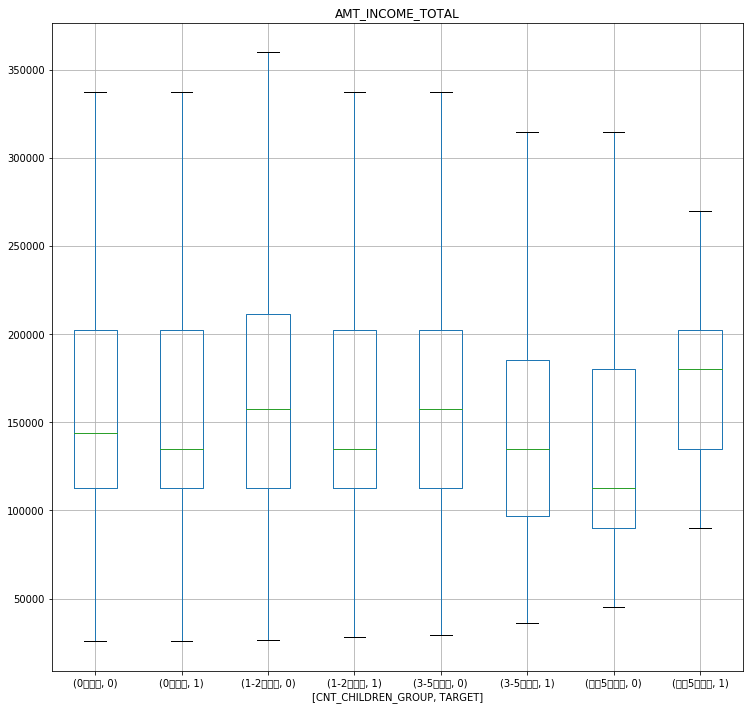

In [34]:
#2-2
##figsize=(寬度英吋,高度英吋);dpi=每英吋多少像素
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

data_app1.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

### Z轉換公式
- z = (x-x.mean()) / x.std()

In [32]:
#3
#在數學和訊號處理中，Z轉換（英語：Z-transform）把一連串離散的實數或複數訊號，從時域轉為復頻域表示。
"""
Your code here
"""


data_app1['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

data_app1[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135


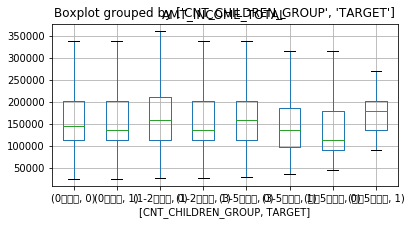

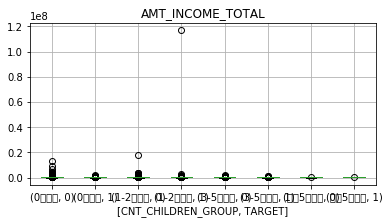

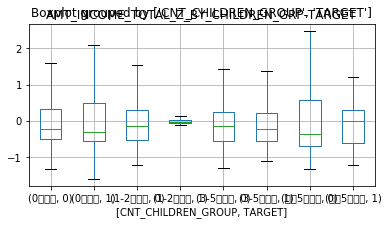

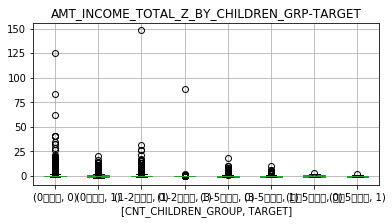

In [40]:
#在觀察數據時，發現1~2位小孩組數具有異常，如圖
# 因此在做Normalize之前要先filter outlier
plt_column = ['AMT_INCOME_TOTAL']
plt_by = grp

data_app1.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(6,3))
data_app1.boxplot(column=plt_column, by = plt_by, showfliers = True, figsize=(6,3))

plt.suptitle('')
plt.show()

#經z轉換後，圖形分佈產生變化
plt_column =['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']
plt_by = grp

data_app1.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(6,3))
data_app1.boxplot(column=plt_column, by = plt_by, showfliers = True, figsize=(6,3))

plt.suptitle('')
plt.show()
